<a href="https://colab.research.google.com/github/rachelsseo/DS1002A/blob/main/Lab_FTXPartnerSubmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1:  FTX

### Due Monday 1 April at noon

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. In November Bankman-Fried was found guilty on seven counts of fraud and conspiracy.  His sentencing hearing is today.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code.

**Put code and outputs in this notebook.**


## Group Submissions

As usual you may work in a group to complete this lab, with no more than 3 members in a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [ ]:
# List group members (if applicable). Identify names and computing IDs
#
# Name:                  Computing ID:
# Rachel Seo              ydp7xv
# Mackenzie Alber         qmz5zn

## 1. Load Libraries & Data

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [ ]:
# Load Libraries and CSV file
import pandas as pd
import numpy as np

ftx = pd.read_csv('./ftx.csv', sep = ";")

## 2. Get Summary Data

In code, display how many rows and columns are in the raw dataset.

In [ ]:
num_rows, num_cols = ftx.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 741
Number of columns: 11


## 3. Clean and Organize the Data

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`



In [ ]:
ftx = ftx.drop_duplicates()
ftx = ftx.dropna()
dropped_columns = ['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap']
ftx = ftx.drop(dropped_columns, axis=1)

Now display the first 10 rows of the cleaned dataset.

In [ ]:
ftx[0:10]

,open,high,low,close,volume,timestamp
0,0.838968,0.853502,0.835226,0.842688,3001502.06,2022-12-31T23:59:59.999Z
1,0.860193,0.864752,0.826643,0.839048,3608615.07,2022-12-30T23:59:59.999Z
2,0.885723,0.887118,0.843029,0.860231,3766979.57,2022-12-29T23:59:59.999Z
3,0.921162,0.925702,0.869842,0.886091,4192949.85,2022-12-28T23:59:59.999Z
4,0.931138,0.955402,0.916414,0.923668,4574953.05,2022-12-27T23:59:59.999Z
5,0.894567,1.011183,0.893652,0.930696,7065306.21,2022-12-26T23:59:59.999Z
6,0.924432,0.935517,0.894370,0.894657,2577834.83,2022-12-25T23:59:59.999Z
7,0.957505,0.975671,0.921085,0.924433,5055004.16,2022-12-24T23:59:59.999Z
8,1.027133,1.038282,0.948058,0.957006,17088962.94,2022-12-23T23:59:59.999Z
9,0.873973,1.127198,0.835625,1.027162,22418556.51,2022-12-22T23:59:59.999Z


## 4. Calculate Daily Gains/Losses

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Hint: This is not complicated and does not require a for-loop.  See the Pandas review notebook for reference.

In [ ]:
ftx['close_change'] = ftx['close'].diff()

## 5. Identify Growth Days

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [ ]:
top_positive_growth = ftx.sort_values(by='close_change', ascending=False).head(10)
top_positive_growth

,open,high,low,close,volume,timestamp,close_change
56,22.263740,23.151038,21.923954,22.142196,7.211689e+08,2022-11-07T23:59:59.999Z,16.623292
468,71.161896,71.519686,66.035973,67.482300,4.886910e+08,2021-09-16T23:59:59.999Z,14.497738
598,50.424719,54.028511,50.015720,50.955200,1.552346e+08,2021-05-18T23:59:59.999Z,14.017812
478,67.676450,72.960747,66.715633,71.181617,5.739419e+08,2021-09-15T23:59:59.999Z,9.506381
473,63.646636,63.964677,59.981068,60.813879,4.261729e+08,2021-09-19T23:59:59.999Z,8.315742
484,77.694911,85.016852,71.891980,79.871313,3.338582e+09,2021-09-09T23:59:59.999Z,6.929033
350,46.731222,49.846724,45.218760,45.225963,2.595717e+08,2022-01-20T23:59:59.999Z,6.770635
594,36.064557,36.743029,32.408227,33.298743,1.336769e+08,2021-05-22T23:59:59.999Z,6.228516
481,72.638122,77.945811,70.939263,73.528094,9.845208e+08,2021-09-12T23:59:59.999Z,5.201864
605,59.203232,61.358692,57.460908,61.283271,1.261705e+08,2021-05-11T23:59:59.999Z,5.154806


## 6. Calculate the Percentage Rate of Change

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [ ]:
ftx['rate_of_change'] = ftx['close_change'].pct_change()

## 7. Identify Days of Greatest Percentage Change

Based on the rate change column calculated above, identify the top 5 days of greatest positive rate change, and the top 5 days of greatest negative rate change.

Display your results in a table showing both the rate of change and their dates.

In [ ]:
#Code for top 5 days for greatest positive rate change
ftx_change = ftx.sort_values(by='rate_of_change', ascending=False)

top_positive = ftx_change.head(5)

#Code for top 5 days for greatest negative rate change
neg_growth = ftx[ftx['rate_of_change'] < 0]
neg_growth = neg_growth.sort_values(by='rate_of_change', ascending=False)

top_negative = neg_growth.tail(5)

# Displaying results
print("Top 5 days of greatest positive rate change:")
print(top_positive)

print("\nTop 5 days of greatest negative rate change:")
print(top_negative)

Top 5 days of greatest positive rate change:
          open       high        low      close        volume  \
110  25.896563  26.190844  24.944427  25.502901  9.412177e+07   
516  44.909041  45.953509  42.591500  43.567040  9.176495e+07   
182  25.195396  26.436214  24.829446  26.265272  9.748761e+07   
369  38.929169  40.255160  38.096745  38.313816  2.042550e+08   
216  26.908904  27.236493  26.476346  27.139270  5.415570e+07   

                    timestamp  close_change  rate_of_change  
110  2022-09-14T23:59:59.999Z      1.435608      273.028254  
516  2021-08-08T23:59:59.999Z     -5.325192      216.674634  
182  2022-07-06T23:59:59.999Z     -1.193918      178.229185  
369  2021-12-31T23:59:59.999Z     -1.890430       97.180950  
216  2022-06-02T23:59:59.999Z      1.144636       58.778546  

Top 5 days of greatest negative rate change:
          open       high        low      close        volume  \
306  40.460654  41.488157  39.886015  41.159862  7.284551e+07   
193  26.735400  

## 8. Plot the Data

Create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

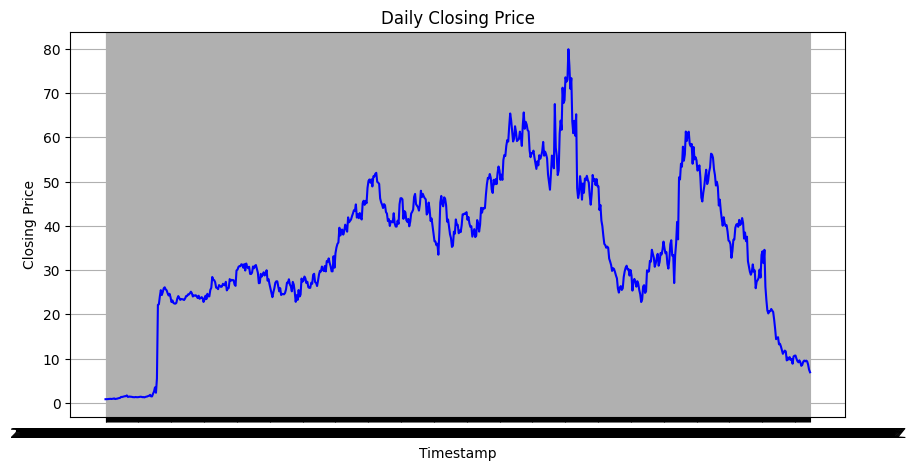

In [ ]:
# Daily closing price
plt.figure(figsize=(10, 5))
plt.plot(ftx['timestamp'], ftx['close'], color='blue')
plt.title('Daily Closing Price')
plt.xlabel('Timestamp')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

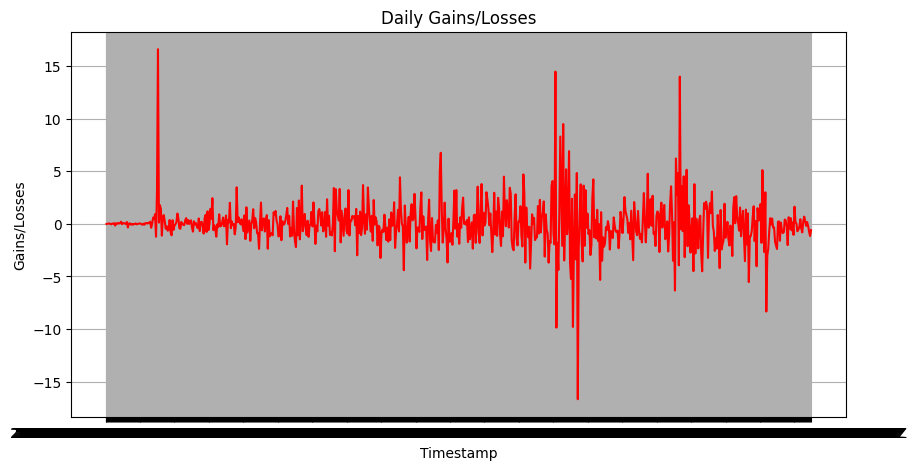

In [ ]:
# Daily gains/losses
plt.figure(figsize=(10, 5))
plt.plot(ftx['timestamp'], ftx['close_change'], color='red')
plt.title('Daily Gains/Losses')
plt.xlabel('Timestamp')
plt.ylabel('Gains/Losses')
plt.grid(True)
plt.show()

Combine the two plots from above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

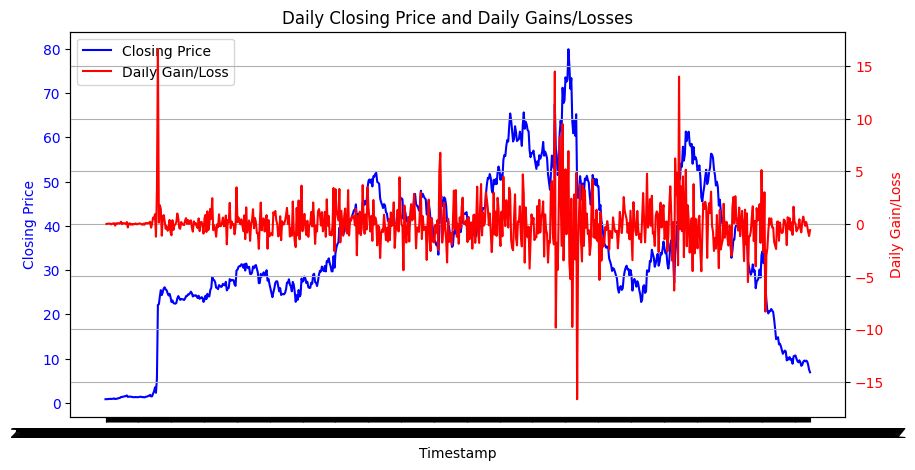

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Closing Price
ax1.plot(ftx['timestamp'], ftx['close'], color='blue', label='Closing Price')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Closing Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Daily Gains/Losses
ax2 = ax1.twinx()
ax2.plot(ftx['timestamp'], ftx['close_change'], color='red', label='Daily Gain/Loss')
ax2.set_ylabel('Daily Gain/Loss', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='upper left')

plt.title('Daily Closing Price and Daily Gains/Losses')
plt.grid(True)
plt.show()